## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [18]:
import pandas as pd

# load dataframe from CSV file
url = "https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz"
df = pd.read_csv(url)


In [20]:
print(f"The dataframe contains {df.shape[0]} articles.")

The dataframe contains 30165 articles.


<Axes: xlabel='count', ylabel='category'>

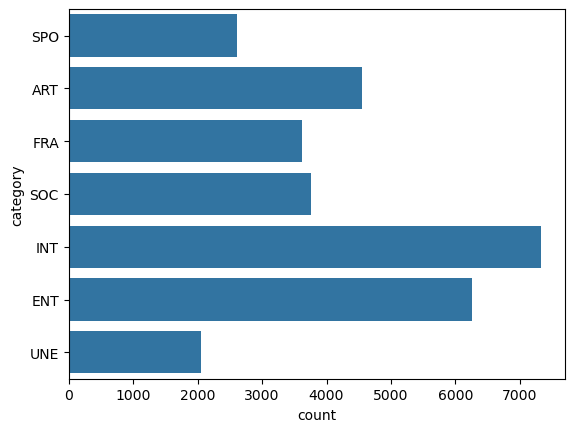

In [19]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
sns.countplot(data=df, y='category')

In [24]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)

print("Example of articles :")
pd.DataFrame.sample(df, n=4)

Example of articles :


,text,category
13884,le directeur général de crédit agricole sa jean laurent a été désigné jeudi à la présidence du crédit lyonnais filiale de la banque verte à la suite de la démission de jean peyrelevade la démission de m. peyrelevade était programmée pour la fin de l'année mais il a annoncé le 2 octobre son retrait prématuré pour pouvoir se défendre dans l'affaire executive life,ENT
16885,christina weiss la secrétaire d'etat allemande à la culture a annoncé que l'etat fédéral va accorder en 2003 25 millions d'euros de subventions culturelles à la ville-etat de berlin afin de sauver ses trois opéras dont la municipalité très endettée ne peut plus assumer l'entretien en outre une réunion de certains des services des trois maisons deutsche oper staatsoper et komische oper devrait permettre d'économiser 10 millions d'euros par an le musée d'art moderne de saint-etienne qui détient l'une des plus importantes collections d'art moderne et contemporain en france accueille son nouveau directeur général lorand hegyi ce dernier d'origine hongroise a été de 1990 à 2002 directeur du musée d'art moderne ludwig à vienne autriche le sculpteur italien mario merz l'artiste-peintre britannique bridget riley le chef d'orchestre italien claudio abbado le réalisateur de théâtre et de cinéma britannique ken loach et l'architecte néerlandais rem koolhaas nés entre 1925 et 1944 sont les lauréats pour 2003 du premium imperiale ce prix qui doit être remis à tokyo en octobre est doté d'un montant de 15 000 pour chacun des artistes sélectionnés par des comités réunis dans cinq pays occidentaux en france le comité est présidé par raymond barre l'annonce le 2 juillet a été faite lors d'un déjeuner préparé par alain passard le chef du restaurant l'arpège rue de varenne à paris la gastronomie n'est pas pour l'instant une discipline artistique reconnue par cette distinction créée en 1989 qui a aussi attribué une bourse à l'association de sono qui forme de jeunes musiciens en italie les précédents lauréats du prix premium imperiale dans la catégorie architecture ont été jean nouvel en 2001 et norman foster en 2002 sean connery s'est vu attribuer par le magazine britannique the empire le pire accent au cinéma de tous les temps pour son rôle de policier irlandais dans les incorruptibles de brian de palma selon le jury de professionnels du cinéma consulté par le mensuel l'ancien james bond ne réussit jamais malgré tous ses efforts à masquer son accent écossais derrière le personnage du policier irlandais jim malone rôle pour lequel il a été récompensé d'un oscar en 1987 dans ce classement sean connery devance brad pitt alpiniste autrichien dans sept ans au tibet de jean-jacques annaud julia roberts pour son apparition en servante du dr jekyll dans mary reilly de stephen frears ou meryl streep campant la romancière sud-africaine karen blixen dans out of africa de sydney pollack,ART
20651,1 vous êtes le directeur pour l'asie du sud de l'organisation internationale du travail oit les multinationales multiplient les vérifications sociales chez leurs fournisseurs en se basant sur les droits fondamentaux de l'homme au travail que votre organisation a édictés qu'en pensez-vous c'est plutôt satisfaisant de savoir que les codes de conduite auxquels se réfèrent les multinationales sont basés sur nos textes cela étant dit après la multiplication des initiatives de toutes sortes il serait intéressant de tendre vers une plus grande standardisation par grande industrie tout ce processus doit également se faire de façon respectueuse parallèlement au développement du pays même s'il existe une demande forte des acheteurs occidentaux pour améliorer des conditions de travail chez leurs fournisseurs il faut faire attention à ne pas aller trop vite il s'agit de travailler de façon progressive en réelle collaboration avec les entreprises locales tout cela va prendre des années l'approche volontaire du global compact proposé par les nations unies les entreprises adhèrent à une liste 

Category: ENT


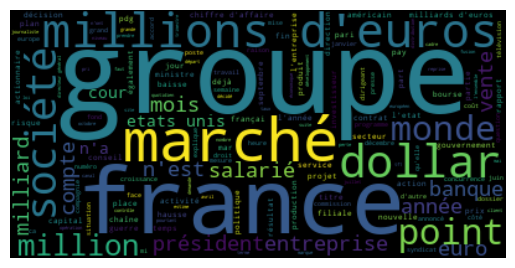

Category: INT


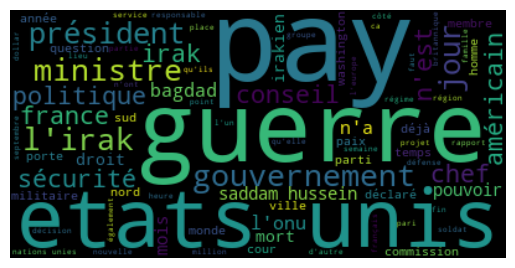

Category: ART


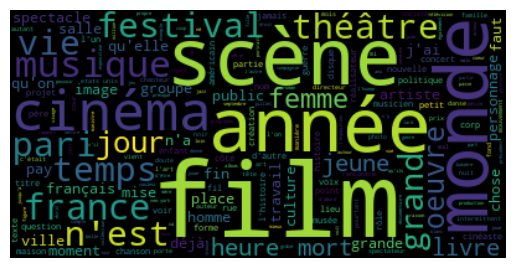

Category: SOC


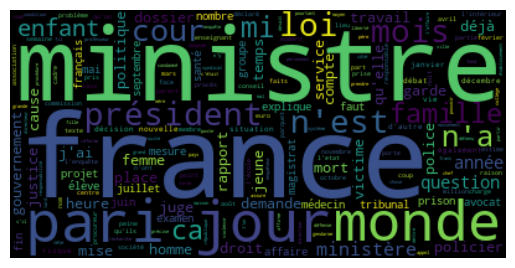

Category: FRA


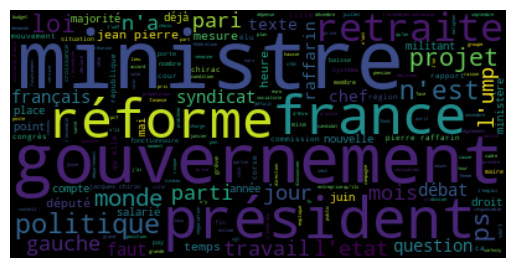

In [57]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    text = df[df.category == cat].iloc[:,0].str.cat(sep=' ')
    wordcloud = WordCloud(stopwords = STOPWORDS).generate(text)
    print(f"Category: {cat}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [73]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size

df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2)
df_dev, df_test = train_test_split(df_test, train_size=0.5, test_size=0.5)

X_train = df_train.iloc[:,0]
y_train = df_train.iloc[:,1]

X_dev = df_dev.iloc[:,0]
y_dev = df_dev.iloc[:,1]

X_test = df_test.iloc[:,0]
y_test = df_test.iloc[:,1]

print(f"Size of the train set: {X_train.shape[0]}.")
print(f"Size of the dev set: {X_dev.shape[0]}.")
print(f"Size of the test set: {X_test.shape[0]}.")

Size of the train set: 24132.
Size of the dev set: 3016.
Size of the test set: 3017.


In [82]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# create the vectorizer object
vectorizer = CountVectorizer(max_features=1000)

# fit on train data
vectorizer.fit(X_train)

# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

In [84]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier

# create the MultinomialNB
clf = MultinomialNB()

# Train 
clf.fit(X_train_counts, y_train)

# Evaluate 
print("Accuracy on the train set:", clf.score(X_train_counts, y_train))
print("Accuracy on the dev set:", clf.score(X_dev_counts, y_dev))
print("Accuracy on the test set:", clf.score(X_test_counts, y_test))

Accuracy on the train set: 0.7291977457318084
Accuracy on the dev set: 0.7314323607427056
Accuracy on the test set: 0.7172688100762347


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [90]:
# Create a TF-IDF representation with no normalization
tf_transformer = TfidfTransformer(norm=None).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

# Train a MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tf, y_train)

# Evaluate 
print("Accuracy on the train set:", clf.score(X_train_tf, y_train))
print("Accuracy on the dev set:", clf.score(X_dev_tf, y_dev))
print("Accuracy on the test set:", clf.score(X_test_tf, y_test))

Accuracy on the train set: 0.7353721200066302
Accuracy on the dev set: 0.7364058355437666
Accuracy on the test set: 0.7242293669207822


In [91]:
# Create a TF-IDF representation with l1 norm
tf_transformer = TfidfTransformer(norm='l1').fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

# Train a MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tf, y_train)

# Evaluate 
print("Accuracy on the train set:", clf.score(X_train_tf, y_train))
print("Accuracy on the dev set:", clf.score(X_dev_tf, y_dev))
print("Accuracy on the test set:", clf.score(X_test_tf, y_test))

Accuracy on the train set: 0.3915547820321565
Accuracy on the dev set: 0.3763262599469496
Accuracy on the test set: 0.3841564468014584


In [92]:
from sklearn.feature_extraction.text import TfidfTransformer

# Create a TF-IDF representation with l2 norm
tf_transformer = TfidfTransformer(norm='l2').fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

# Train a MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tf, y_train)

# Evaluate 
print("Accuracy on the train set:", clf.score(X_train_tf, y_train))
print("Accuracy on the dev set:", clf.score(X_dev_tf, y_dev))
print("Accuracy on the test set:", clf.score(X_test_tf, y_test))

Accuracy on the train set: 0.7454831758660699
Accuracy on the dev set: 0.7463527851458885
Accuracy on the test set: 0.733510109380179


The best test set accuracy is obtained with the 'l2' norm.

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


In [107]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_test = clf.predict(X_test_tf)
classification_report(y_test, y_pred_test)


'              precision    recall  f1-score   support\n\n         ART       0.73      0.88      0.80       449\n         ENT       0.76      0.85      0.80       622\n         FRA       0.62      0.66      0.64       374\n         INT       0.76      0.87      0.81       724\n         SOC       0.63      0.56      0.60       367\n         SPO       0.92      0.76      0.83       272\n         UNE       1.00      0.00      0.01       209\n\n    accuracy                           0.73      3017\n   macro avg       0.77      0.65      0.64      3017\nweighted avg       0.75      0.73      0.71      3017\n'

In [108]:
confusion_matrix(y_test, y_pred_tf)


array([[393,  21,   9,  15,   9,   2,   0],
       [ 23, 527,  21,  35,  12,   4,   0],
       [ 10,  32, 247,  25,  57,   3,   0],
       [ 17,  41,  19, 631,  16,   0,   0],
       [ 23,  25,  68,  43, 207,   1,   0],
       [ 19,  22,   6,  13,   5, 207,   0],
       [ 51,  27,  31,  70,  20,   9,   1]])

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class

# Plot the statistics of classes

# Make the splits and print the sizes for checking

# Apply TfidfVectorizer

# Train MultinomialNB

# Print accuracy

# Print confusion matric


## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.